# Algoritmo K-Means

## Introdução

O K-Means é um algoritmo de aprendizado não supervisionado usado para agrupar dados em `k` clusters.
Ele busca dividir os dados de forma que os pontos dentro de um cluster sejam mais próximos entre si
do que de qualquer outro cluster.

---

## Objetivo

Minimizar a soma das distâncias quadradas entre os pontos de um cluster e o centroide associado.
A fórmula para a função objetivo é:

$$
\text{Minimizar} \sum_{i=1}^{k} \sum_{x \in C_i} \| x - \mu_i \|^2
$$

- $C_i$: conjunto de pontos no cluster $i$.
- $\mu_i$: centroide do cluster $i$.

---

## Implementação do K-Means com `scikit-learn`

Vamos utilizar o pacote `scikit-learn` para aplicar o K-Means em um conjunto de dados simulado.

### Gerando os Dados

Os dados serão gerados usando a função `make_blobs` para criar 4 clusters bem definidos.

In [3]:
# Gerar dados simulados
from sklearn.datasets import make_blobs

n_samples = 300
n_features = 2
n_clusters = 4
random_state = 42

X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=random_state)

Vamos visualizar os dados gerados:


C:\Users\LAMII\AppData\Local\Temp\ipykernel_21020\4123419385.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')


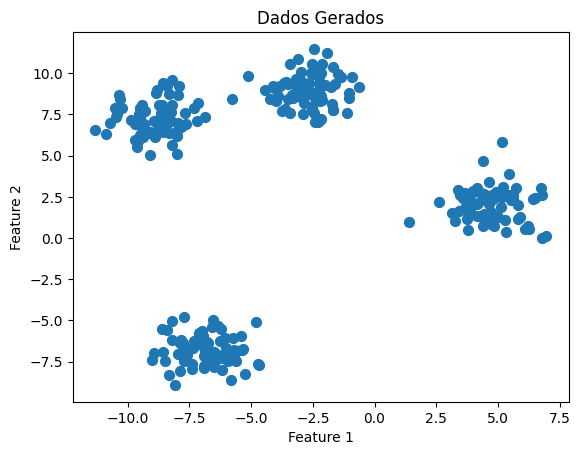

In [4]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], s=50, cmap='viridis')
plt.title("Dados Gerados")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

### Aplicando o K-Means

Agora, aplicamos o algoritmo K-Means para encontrar os clusters nos dados gerados.

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Obter os rótulos dos clusters
y_kmeans = kmeans.labels_

# Obter os centroides
centroids = kmeans.cluster_centers_

C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


### Visualizando os Clusters

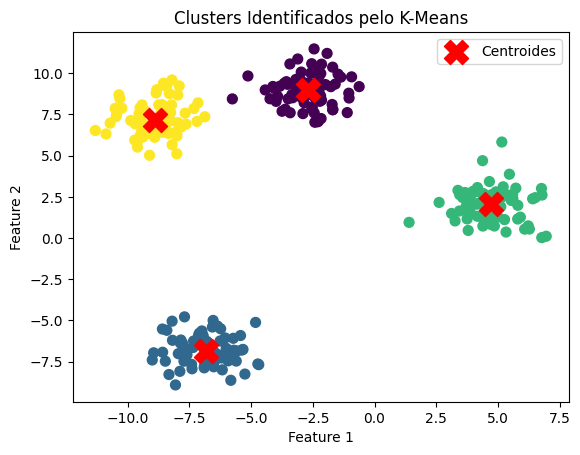

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', marker='X', label='Centroides')
plt.title("Clusters Identificados pelo K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

### Avaliação do Número de Clusters: Método do Cotovelo

O método do cotovelo é uma técnica usada para identificar o número ideal de clusters (\(k\)) no algoritmo K-Means. Ele analisa como a **inércia** (uma medida da compactação dos clusters) varia com o número de clusters.

---

### **O que é inércia?**
A inércia mede o quão próximos os pontos estão do centroide de seu cluster. Ela é calculada como a soma das distâncias quadradas entre cada ponto e o centroide do cluster ao qual pertence.

$$
\text{Inércia} = \sum_{i=1}^{k} \sum_{x \in C_i} || x - \mu_i ||^2
$$

- $C_i$: Conjunto de pontos no cluster $i$.
- $\mu_i$: Centroide do cluster $i$.

Clusters mais compactos têm menor inércia.

---

### **Como usar o Método do Cotovelo**

1. **Executar o K-Means para diferentes valores de \(k\)**:
   - Calcule a inércia para \(k = 1, 2, 3, \dots, n\).

2. **Criar um gráfico (inércia vs. \(k\))**:
   - No eixo \(x\): o número de clusters (\(k\)).
   - No eixo \(y\): o valor da inércia.

3. **Interpretar o gráfico**:
   - A inércia diminui rapidamente para valores baixos de \(k\), porque clusters maiores são divididos.
   - O ponto onde a diminuição desacelera significativamente forma um "cotovelo".
   - Esse ponto é o \(k\) ideal, pois aumentar \(k\) além disso traz ganhos marginais.

---

### **Exemplo de Interpretação**

Imagine que o gráfico mostre:
- Para \(k = 1\): Inércia alta.
- Para \(k = 2, 3, 4\): Queda acentuada na inércia.
- Para \(k > 4\): Queda lenta ou estabilização da inércia.

Neste caso, o "cotovelo" ocorre em \(k = 4\), indicando que 4 clusters é a melhor escolha.

C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

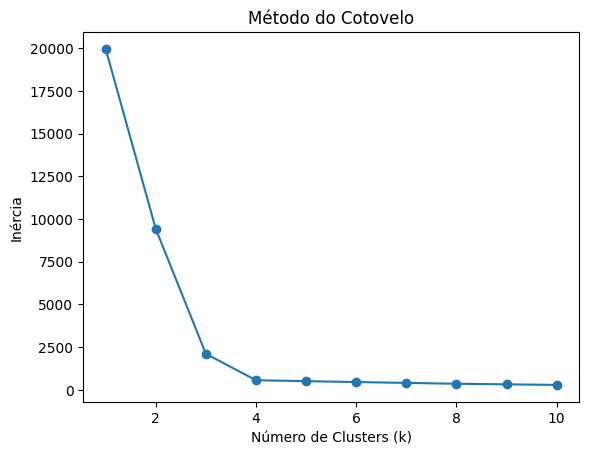

In [7]:
inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title("Método do Cotovelo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.show()

## Considerações Finais

- O K-Means é eficiente para dados bem separados e esféricos.
- A escolha do número de clusters \(k\) é crucial e pode ser guiada por métodos como o cotovelo.
- Sensível a outliers e inicialização dos centroides.

---

## Referências

1. `scikit-learn` documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


---
---
# K-Means com PCA no Iris Dataset


C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

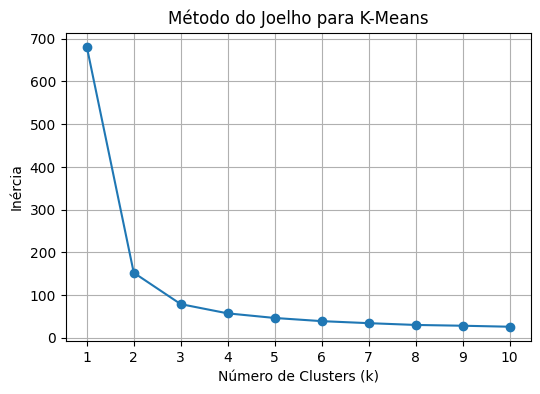

In [8]:
# Importar bibliotecas necessárias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

# Carregar o dataset Iris
iris = load_iris()
X = iris.data  # Dados do Iris Dataset

# Aplicar o Método do Joelho
inertia = []
k_values = range(1, 11)  # Testar de 1 a 10 clusters

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotar o gráfico do Método do Joelho
plt.figure(figsize=(6, 4))
plt.plot(k_values, inertia, marker='o')
plt.title("Método do Joelho para K-Means")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inércia")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [9]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Carregar o dataset Iris
iris = load_iris()
X = iris.data  # Dados (atributos)
y = iris.target  # Classes verdadeiras (para comparação)

# Criar um DataFrame para visualização
df = pd.DataFrame(X, columns=iris.feature_names)
print("Primeiras amostras do dataset:")
print(df.head())


Primeiras amostras do dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


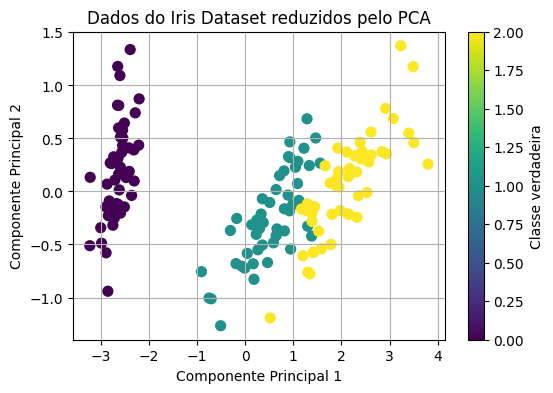

In [10]:
# Reduzir os dados para 2D usando PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plotar os dados reduzidos pelo PCA
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("Dados do Iris Dataset reduzidos pelo PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Classe verdadeira")
plt.grid()
plt.show()


--- 
## Usar o k-means para descobrir os clusters


C:\Users\LAMII\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


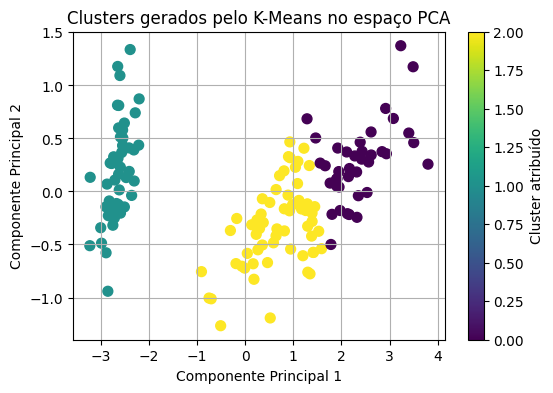

In [11]:

# Aplicar K-Means com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plotar os clusters gerados pelo K-Means no espaço PCA
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clusters gerados pelo K-Means no espaço PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster atribuído")
plt.grid()
plt.show()

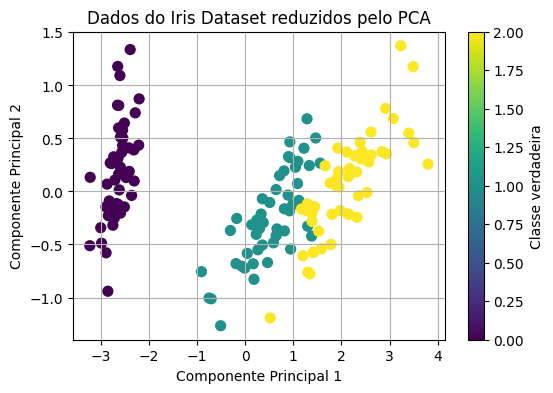

In [12]:
plt.figure(figsize=(6, 4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("Dados do Iris Dataset reduzidos pelo PCA")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Classe verdadeira")
plt.grid()
plt.show()

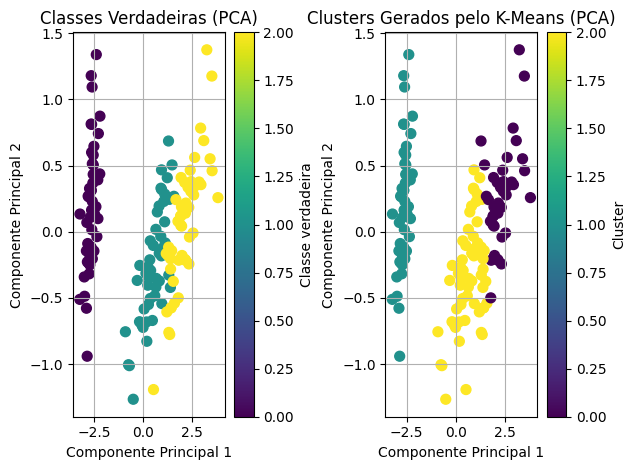

In [13]:
# Gráfico 1: Classes verdadeiras
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title("Classes Verdadeiras (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Classe verdadeira")
plt.grid()

# Gráfico 2: Clusters do K-Means
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("Clusters Gerados pelo K-Means (PCA)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.colorbar(label="Cluster")
plt.grid()

plt.tight_layout()
plt.show()